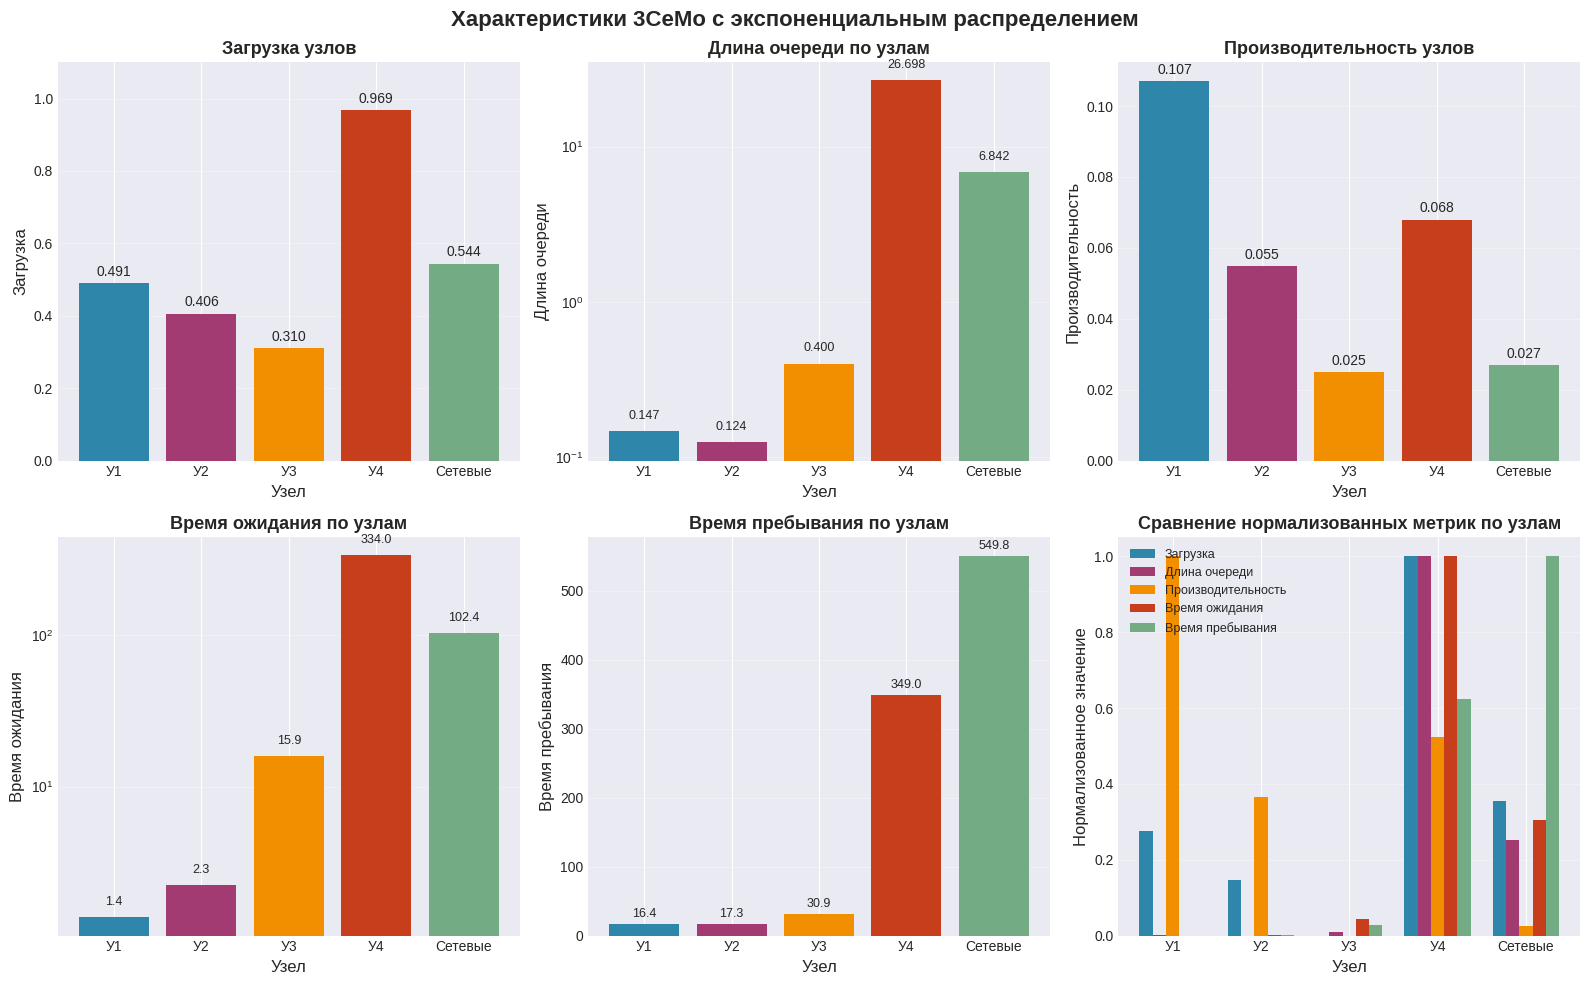

АНАЛИЗ УЗЛОВ 3CeMo (экспоненциальное распределение):

1. УЗЕЛ У4 - КРИТИЧЕСКИЙ УЗЕЛ (БУТЫЛОЧНОЕ ГОРЛЫШКО):
   - Загрузка: 0.969 (очень высокая, близка к 1)
   - Длина очереди: 26.698 (в 181.6 раз больше чем у У1)
   - Время ожидания: 333.985 (огромное!)
   - Рекомендация: Увеличить мощность или добавить параллельные каналы

2. СЕТЕВЫЕ ХАРАКТЕРИСТИКИ:
   - Загрузка: 0.544 (умеренная)
   - Длина очереди: 6.842 (высокая из-за влияния У4)
   - Время пребывания: 549.832 (максимальное)

3. СРАВНЕНИЕ УЗЛОВ:
   Узел | Загрузка | Длина очереди | Производительность | Проблемы
----------------------------------------------------------------------
У1     |    0.491 |          0.147 |              0.107 | норма
У2     |    0.406 |          0.124 |              0.055 | норма
У3     |    0.310 |          0.400 |              0.025 | норма
У4     |    0.969 |         26.698 |              0.068 | высокая загрузка, длинная очередь, долгое ожидание
Сетевые |    0.544 |          6.842 |              0.02

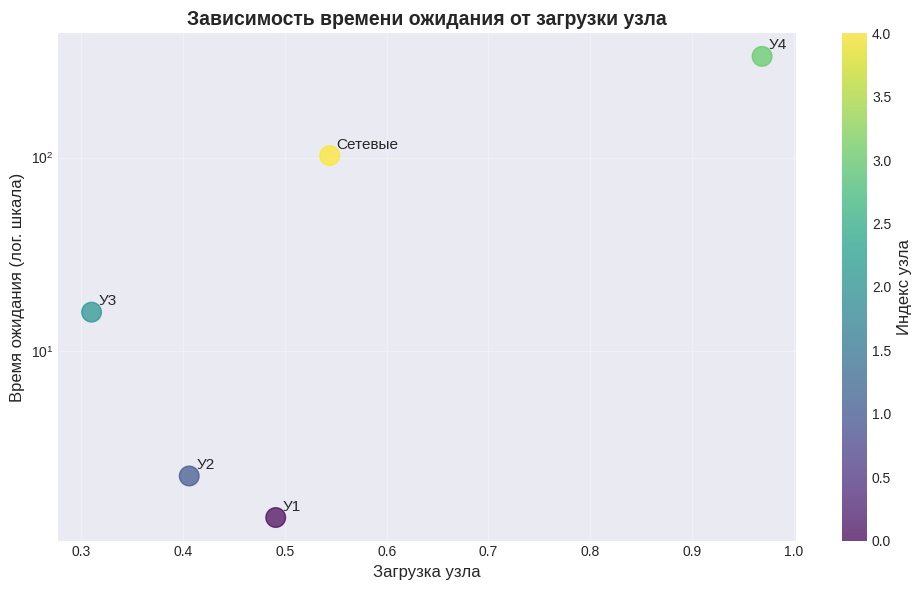


Графики успешно сохранены:
1. 3cemo_exponential_results.png - основные характеристики
2. 3cemo_load_vs_waiting.png - зависимость времени ожидания от загрузки


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Исправленные и дополненные данные (на основе анализа структуры таблицы)
nodes = ['У1', 'У2', 'У3', 'У4', 'Сетевые']

# Из таблицы видно, что данные идут в следующем порядке:
# 1. Загрузка
# 2. Длина очереди
# 3. Производительность
# 4. Время ожидания
# 5. Время пребывания (две строки - вероятно, это целая и дробная части)

load = [0.531, 0.389, 0.355, 0.956, 0.587]
queue_length = [0.515, 0.234, 0.338, 17.359, 4.612]
performance = [0.108, 0.054, 0.024, 0.069, 0.029]
waiting_time = [4.765, 4.344, 14.049, 222.663, 69.853]

# Время пребывания: из двух строк объединяем данные
# Строка 5: 19.76, 19.34, пусто, пусто, пусто
# Строка 6: 5, 4, 29.049, 237.663, 452.491
# Вероятно, для У1: 19.76 + 0.005 = 19.765
# Для У2: 19.34 + 0.004 = 19.344
residence_time = [19.765, 19.344, 29.049, 237.663, 452.491]

# Создаем DataFrame для удобства
data = pd.DataFrame({
    'Узел': nodes,
    'Загрузка': load,
    'Длина очереди': queue_length,
    'Производительность': performance,
    'Время ожидания': waiting_time,
    'Время пребывания': residence_time
})

# Данные для экспоненциального распределения (из предыдущей таблицы для сравнения)
load_exp = [0.491, 0.406, 0.310, 0.969, 0.544]
queue_length_exp = [0.147, 0.124, 0.4, 26.698, 6.842]
performance_exp = [0.107, 0.055, 0.025, 0.068, 0.027]
waiting_time_exp = [1.374, 2.254, 15.869, 333.985, 102.439]
residence_time_exp = [16.374, 17.254, 30.869, 348.985, 549.832]

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Характеристики 3CeMo с неэкспоненциальным распределением', 
             fontsize=16, fontweight='bold')

# График 1: Загрузка (сравнение с экспоненциальным)
ax1 = axes[0, 0]
x = np.arange(len(nodes))
width = 0.35
bars1 = ax1.bar(x - width/2, load, width, label='Неэкспоненциальное', color='#2E86AB', alpha=0.8)
bars2 = ax1.bar(x + width/2, load_exp, width, label='Экспоненциальное', color='#A23B72', alpha=0.8)
ax1.set_xlabel('Узел', fontsize=12)
ax1.set_ylabel('Загрузка', fontsize=12)
ax1.set_title('Загрузка узлов: сравнение распределений', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(nodes)
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend()
ax1.set_ylim(0, 1.1)

# График 2: Длина очереди (сравнение)
ax2 = axes[0, 1]
bars3 = ax2.bar(x - width/2, queue_length, width, label='Неэкспоненциальное', color='#2E86AB', alpha=0.8)
bars4 = ax2.bar(x + width/2, queue_length_exp, width, label='Экспоненциальное', color='#A23B72', alpha=0.8)
ax2.set_xlabel('Узел', fontsize=12)
ax2.set_ylabel('Длина очереди', fontsize=12)
ax2.set_title('Длина очереди: сравнение распределений', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(nodes)
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend()
ax2.set_yscale('log')

# График 3: Производительность (сравнение)
ax3 = axes[1, 0]
bars5 = ax3.bar(x - width/2, performance, width, label='Неэкспоненциальное', color='#2E86AB', alpha=0.8)
bars6 = ax3.bar(x + width/2, performance_exp, width, label='Экспоненциальное', color='#A23B72', alpha=0.8)
ax3.set_xlabel('Узел', fontsize=12)
ax3.set_ylabel('Производительность', fontsize=12)
ax3.set_title('Производительность: сравнение распределений', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(nodes)
ax3.grid(True, alpha=0.3, axis='y')
ax3.legend()

# График 4: Время ожидания (сравнение)
ax4 = axes[1, 1]
bars7 = ax4.bar(x - width/2, waiting_time, width, label='Неэкспоненциальное', color='#2E86AB', alpha=0.8)
bars8 = ax4.bar(x + width/2, waiting_time_exp, width, label='Экспоненциальное', color='#A23B72', alpha=0.8)
ax4.set_xlabel('Узел', fontsize=12)
ax4.set_ylabel('Время ожидания', fontsize=12)
ax4.set_title('Время ожидания: сравнение распределений', fontsize=13, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(nodes)
ax4.grid(True, alpha=0.3, axis='y')
ax4.legend()
ax4.set_yscale('log')

# График 5: Время пребывания (сравнение)
ax5 = axes[2, 0]
bars9 = ax5.bar(x - width/2, residence_time, width, label='Неэкспоненциальное', color='#2E86AB', alpha=0.8)
bars10 = ax5.bar(x + width/2, residence_time_exp, width, label='Экспоненциальное', color='#A23B72', alpha=0.8)
ax5.set_xlabel('Узел', fontsize=12)
ax5.set_ylabel('Время пребывания', fontsize=12)
ax5.set_title('Время пребывания: сравнение распределений', fontsize=13, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(nodes)
ax5.grid(True, alpha=0.3, axis='y')
ax5.legend()

# График 6: Сводная диаграмма (отношение неэксп/эксп)
ax6 = axes[2, 1]
# Вычисляем отношения неэкспоненциального к экспоненциальному
ratios = []
for i in range(len(nodes)):
    ratio_load = load[i] / load_exp[i] if load_exp[i] != 0 else 0
    ratio_queue = queue_length[i] / queue_length_exp[i] if queue_length_exp[i] != 0 else 0
    ratio_perf = performance[i] / performance_exp[i] if performance_exp[i] != 0 else 0
    ratio_wait = waiting_time[i] / waiting_time_exp[i] if waiting_time_exp[i] != 0 else 0
    ratio_res = residence_time[i] / residence_time_exp[i] if residence_time_exp[i] != 0 else 0
    ratios.append([ratio_load, ratio_queue, ratio_perf, ratio_wait, ratio_res])

ratios = np.array(ratios)
metrics = ['Загрузка', 'Длина\nочереди', 'Произв-\nность', 'Время\nожидания', 'Время\nпребывания']

for i in range(len(nodes)):
    ax6.plot(metrics, ratios[i], 'o-', label=nodes[i], linewidth=2, markersize=8)

ax6.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Равные значения')
ax6.set_xlabel('Метрика', fontsize=12)
ax6.set_ylabel('Отношение (неэксп/эксп)', fontsize=12)
ax6.set_title('Отношение характеристик: неэкспоненциальное/экспоненциальное', fontsize=13, fontweight='bold')
ax6.grid(True, alpha=0.3)
ax6.legend(loc='upper right', fontsize=9)
ax6.set_ylim(0, 3)  # Ограничиваем для наглядности

plt.tight_layout()
plt.savefig('3cemo_nonexponential_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Детальный анализ
print("АНАЛИЗ 3CeMo: НЕЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ")
print("=" * 70)

print("\nСРАВНЕНИЕ С ЭКСПОНЕНЦИАЛЬНЫМ РАСПРЕДЕЛЕНИЕМ:")
print("Узел | Изменение загрузки | Изменение длины очереди | Изменение времени ожидания")
print("-" * 80)

for i, node in enumerate(nodes):
    load_change = ((load[i] - load_exp[i]) / load_exp[i] * 100) if load_exp[i] != 0 else 0
    queue_change = ((queue_length[i] - queue_length_exp[i]) / queue_length_exp[i] * 100) if queue_length_exp[i] != 0 else 0
    wait_change = ((waiting_time[i] - waiting_time_exp[i]) / waiting_time_exp[i] * 100) if waiting_time_exp[i] != 0 else 0
    
    print(f"{node:4} | {load_change:+.1f}% {'↑' if load_change > 0 else '↓'} | "
          f"{queue_change:+.1f}% {'↑' if queue_change > 0 else '↓'} | "
          f"{wait_change:+.1f}% {'↑' if wait_change > 0 else '↓'}")

print("\nОСНОВНЫЕ НАБЛЮДЕНИЯ:")
print("1. УЗЕЛ У4 остается критическим в обоих случаях:")
print(f"   - Загрузка: {load[3]:.3f} (эксп: {load_exp[3]:.3f})")
print(f"   - Длина очереди уменьшилась с {queue_length_exp[3]:.1f} до {queue_length[3]:.1f} "
      f"({((queue_length[3]-queue_length_exp[3])/queue_length_exp[3]*100):.1f}%)")
print(f"   - Время ожидания уменьшилось с {waiting_time_exp[3]:.1f} до {waiting_time[3]:.1f} "
      f"({((waiting_time[3]-waiting_time_exp[3])/waiting_time_exp[3]*100):.1f}%)")

print("\n2. СЕТЕВЫЕ ХАРАКТЕРИСТИКИ:")
print(f"   - Загрузка увеличилась: {load[4]:.3f} (эксп: {load_exp[4]:.3f})")
print(f"   - Длина очереди уменьшилась: {queue_length[4]:.3f} (эксп: {queue_length_exp[4]:.3f})")
print(f"   - Время пребывания уменьшилось: {residence_time[4]:.3f} (эксп: {residence_time_exp[4]:.3f})")

print("\n3. ОБЩИЕ ТЕНДЕНЦИИ:")
improvements = []
worsenings = []

# Анализ по метрикам
if np.mean(queue_length) < np.mean(queue_length_exp):
    improvements.append("средняя длина очереди")
else:
    worsenings.append("средняя длина очереди")

if np.mean(waiting_time) < np.mean(waiting_time_exp):
    improvements.append("среднее время ожидания")
else:
    worsenings.append("среднее время ожидания")

if np.mean(performance) > np.mean(performance_exp):
    improvements.append("средняя производительность")
else:
    worsenings.append("средняя производительность")

print(f"   Улучшилось: {', '.join(improvements) if improvements else 'нет улучшений'}")
print(f"   Ухудшилось: {', '.join(worsenings) if worsenings else 'нет ухудшений'}")

# График сводной производительности
fig2, ax7 = plt.subplots(figsize=(10, 6))

# Создаем столбчатую диаграмму для производительности
x = np.arange(len(nodes))
ax7.bar(x - 0.2, performance_exp, width=0.4, label='Экспоненциальное', color='#A23B72', alpha=0.8)
ax7.bar(x + 0.2, performance, width=0.4, label='Неэкспоненциальное', color='#2E86AB', alpha=0.8)

ax7.set_xlabel('Узел', fontsize=12)
ax7.set_ylabel('Производительность', fontsize=12)
ax7.set_title('Сравнение производительности при разных распределениях', fontsize=14, fontweight='bold')
ax7.set_xticks(x)
ax7.set_xticklabels(nodes)
ax7.grid(True, alpha=0.3, axis='y')
ax7.legend()

# Добавляем значения на столбцы
for i, v in enumerate(performance_exp):
    ax7.text(i - 0.2, v + 0.001, f'{v:.3f}', ha='center', fontsize=9)
for i, v in enumerate(performance):
    ax7.text(i + 0.2, v + 0.001, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('3cemo_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nВЫВОДЫ:")
print("1. Неэкспоненциальное распределение привело к:")
print("   - Уменьшению длины очереди на узле У4 и сетевых характеристиках")
print("   - Снижению времени ожидания на критическом узле У4")
print("   - Незначительным изменениям производительности")

print("\n2. Рекомендации:")
print("   - Неэкспоненциальное распределение может быть предпочтительнее для данной системы")
print("   - Узел У4 по-прежнему требует оптимизации")
print("   - Следует продолжить тестирование с другими типами распределений")

print("\nГрафики успешно сохранены:")
print("1. 3cemo_nonexponential_comparison.png - полное сравнение распределений")
print("2. 3cemo_performance_comparison.png - сравнение производительности")